# Practice Session 01+02: Data preparation

Author: <font color="blue">Tània Pazos Puig</font>

E-mail: <font color="blue">tania.pazos01@estudiant.upf.edu</font>

Date: <font color="blue">02/10/2024</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# LEAVE AS-IS

input_dataset = pd.read_csv("data/device_db.csv", sep=",")

## 1.1. Data types and simple statistics

First, we start by printing the dataset header and the first five rows of the dataset.

In [3]:
from IPython.display import display

In [4]:
print("Dataset Header:")
display(pd.DataFrame(input_dataset.columns, columns=["Column Names"]))

print("First 5 Rows:")
display(input_dataset.head())

Dataset Header:


,Column Names
0,PURCHASED_DEVICE
1,DEVICE_VALUE
2,LAST_DEVICE_CHANGE
3,DATA_TRAFFIC_MONTH_1
4,DATA_TRAFFIC_MONTH_2
5,DATA_TRAFFIC_MONTH_3
6,DATA_TRAFFIC_MONTH_4
7,DATA_TRAFFIC_MONTH_5
8,DATA_TRAFFIC_MONTH_6
9,VOICE_TRAFFIC_MONTH_1


First 5 Rows:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


We then create and display a dataframe named `column_type_df` containing one row per column, and with the following fields: name of the column, type, number of distinct elements, and size.

In [5]:
column_data = []

for column in input_dataset.columns:
    column_info = {
        'Column Name': column,
        'Type': input_dataset[column].dtype,
        'Number of Distinct Elements': input_dataset[column].nunique(),
        'Size': input_dataset[column].size
    }
    column_data.append(column_info)

# Create the dataframe
column_type_df = pd.DataFrame(column_data, columns=['Column Name', 'Type', 'Number of Distinct Elements', 'Size'])

display(column_type_df)

,Column Name,Type,Number of Distinct Elements,Size
0,PURCHASED_DEVICE,object,101,10000
1,DEVICE_VALUE,float64,368,10000
2,LAST_DEVICE_CHANGE,float64,76,10000
3,DATA_TRAFFIC_MONTH_1,float64,7215,10000
4,DATA_TRAFFIC_MONTH_2,float64,7182,10000
5,DATA_TRAFFIC_MONTH_3,float64,7176,10000
6,DATA_TRAFFIC_MONTH_4,float64,7124,10000
7,DATA_TRAFFIC_MONTH_5,float64,7173,10000
8,DATA_TRAFFIC_MONTH_6,float64,7074,10000
9,VOICE_TRAFFIC_MONTH_1,float64,3550,10000


The cell below creates and displays a dataframe named `float_columns_df` containing one row per each column of type ``float64`` in the input data, and with the following fields: name of the column, mean, median, min, max -all computed ignoring NaN values.

In [6]:
# Display floats using two decimals
pd.options.display.float_format = '{:.2f}'.format

# Create a list to store statistics for each column of type float64
float_columns_data = []

for column in input_dataset.columns:
    if input_dataset[column].dtype == 'float64':
        # Compute the mean, median, min, and max ignoring NaN values
        column_stats = {
            'Column Name': column,
            'Mean': np.nanmean(input_dataset[column]),     
            'Median': np.nanmedian(input_dataset[column]), 
            'Min': np.nanmin(input_dataset[column]),       
            'Max': np.nanmax(input_dataset[column])        
        }
        float_columns_data.append(column_stats)

# Create the dataframe
float_columns_df = pd.DataFrame(float_columns_data, columns=['Column Name', 'Mean', 'Median', 'Min', 'Max'])

display(float_columns_df)


,Column Name,Mean,Median,Min,Max
0,DEVICE_VALUE,750.48,393.00,15.00,9057.00
1,LAST_DEVICE_CHANGE,20166984.77,20170601.00,20121001.00,20190501.00
2,DATA_TRAFFIC_MONTH_1,3481.83,1208.73,0.00,127017.59
3,DATA_TRAFFIC_MONTH_2,3649.96,1294.95,0.00,111948.84
4,DATA_TRAFFIC_MONTH_3,3653.43,1310.67,0.00,111948.84
5,DATA_TRAFFIC_MONTH_4,3269.44,1176.54,0.00,87856.41
6,DATA_TRAFFIC_MONTH_5,3673.37,1287.09,0.00,121834.81
7,DATA_TRAFFIC_MONTH_6,3427.69,1277.12,0.00,90550.61
8,VOICE_TRAFFIC_MONTH_1,154.85,84.05,0.00,4220.10
9,VOICE_TRAFFIC_MONTH_2,142.57,74.90,0.00,3132.10


We print each column name and use the `describe` function to print statistics for that column.

In [7]:
for column in input_dataset.columns:
    print(f"Column: {column}")
    print(input_dataset[column].describe())
    print("\n")

Column: PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object


Column: DEVICE_VALUE
count   9690.00
mean     750.48
std      979.71
min       15.00
25%      297.00
50%      393.00
75%      609.00
max     9057.00
Name: DEVICE_VALUE, dtype: float64


Column: LAST_DEVICE_CHANGE
count       7682.00
mean    20166984.77
std        10925.77
min     20121001.00
25%     20160801.00
50%     20170601.00
75%     20171001.00
max     20190501.00
Name: LAST_DEVICE_CHANGE, dtype: float64


Column: DATA_TRAFFIC_MONTH_1
count     8868.00
mean      3481.83
std       6364.54
min          0.00
25%         51.92
50%       1208.73
75%       4249.16
max     127017.59
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


Column: DATA_TRAFFIC_MONTH_2
count     8841.00
mean      3649

On the one hand, we computed four basic statistics for `DURATION_LINE`: the mean, the median, and the minimum and maximum values. <br> However, the function `describe` computed these same statistics -although the median is expressed as the 50th percentile- as well as new statics: the `count` value indicating the number of valid entries, the standard deviation `std`, and the 25th and 75th percentiles.

## 1.2. Inventory of device models

The code below displays a census of `PREVIOUS_DEVICE_MODEL` and `PREVIOUS_DEVICE_BRAND`.

In [8]:
# Census of PREVIOUS_DEVICE_MODEL
# Create a new dataframe with two columns: unique values of PREVIOUS_DEVICE_MODEL
# and their counts
previous_device_model_census = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index()
previous_device_model_census.columns = ['Value', 'Frequency']
display(previous_device_model_census)

# Census of PREVIOUS_DEVICE_BRAND
previous_device_brand_census = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
previous_device_brand_census.columns = ['Value', 'Frequency']
display(previous_device_brand_census)


,Value,Frequency
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1


,Value,Frequency
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


Note that the most common device model is iPhone 7, whereas the most common device brand is Samsung. This can be explained because Samsung has many popular device models with high frequency values. When combined together, the frequency of Samsung surpasses the frequency of Apple. Hence, Apple has a particular model -iPhone 7- with high popularity at a given moment, but this popularity is not enough to make Apple the most common brand. 

# 2. Feature engineering

## 2.1. Missing values management

The cell below prints all columns containing at least one NaN value, and the percentage of NaN values in that column.

In [9]:
# Calculate the percentage of NaN values for each column
# .mean() calculates the proportion of True (NaN) values after the isna() function
nan_columns = input_dataset.isna().mean() * 100

# Keep the nan_columns that have a percentage greater than 0 and convert to a dataframe
nan_columns = nan_columns[nan_columns > 0].reset_index()
nan_columns.columns = ['Column Name', 'Percentage of NaN Values']

# Display column as percentages
nan_columns['Percentage of NaN Values'] = nan_columns['Percentage of NaN Values'].map('{:.2f}%'.format)

display(nan_columns)

,Column Name,Percentage of NaN Values
0,PURCHASED_DEVICE,1.47%
1,DEVICE_VALUE,3.10%
2,LAST_DEVICE_CHANGE,23.18%
3,DATA_TRAFFIC_MONTH_1,11.32%
4,DATA_TRAFFIC_MONTH_2,11.59%
5,DATA_TRAFFIC_MONTH_3,11.54%
6,DATA_TRAFFIC_MONTH_4,11.83%
7,DATA_TRAFFIC_MONTH_5,11.34%
8,DATA_TRAFFIC_MONTH_6,14.65%
9,VOICE_TRAFFIC_MONTH_1,11.32%


We first remove the rows where there is no `PURCHASED_DEVICE`, `DEVICE_VALUE`, or `PREVIOUS_DEVICE_MODEL`. 

In [10]:
# Remove rows that have NaN in the specified columns with dropna()
df02 = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])

We then change the NaN values of `DATA_TRAFFIC_MONTH_(1..6)`, `VOICE_TRAFFIC_MONTH_(1..6)`, `BILLING_MONTH_(1..6)`, or `DEVICE_COST_MONTH_(1..6)` to 0.

In [11]:
# List of columns to be filled with 0 for NaN values
columns_to_fill = [
    'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
    'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
    'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
    'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'
]

# Change NaN values to 0 with fillna(0)
df03 = df02.copy() # Avoid changing df02 directly
df03[columns_to_fill] = df02[columns_to_fill].fillna(0)

If there is no `LINE_ACTIVATION_DATE`, we will assume it is equal to `LAST_DEVICE_CHANGE`.

In [12]:
# Replace NaN values of LINE_ACTIVATION_DATE with values from LAST_DEVICE_CHANGE
df04 = df03.copy()
df04['LINE_ACTIVATION_DATE'].fillna(df04['LAST_DEVICE_CHANGE'], inplace=True)

Let us display the header and the first five rows after the processing.

In [13]:
display(pd.DataFrame(df04.columns, columns=["Dataset Header"]))

display(df04.head())

,Dataset Header
0,PURCHASED_DEVICE
1,DEVICE_VALUE
2,LAST_DEVICE_CHANGE
3,DATA_TRAFFIC_MONTH_1
4,DATA_TRAFFIC_MONTH_2
5,DATA_TRAFFIC_MONTH_3
6,DATA_TRAFFIC_MONTH_4
7,DATA_TRAFFIC_MONTH_5
8,DATA_TRAFFIC_MONTH_6
9,VOICE_TRAFFIC_MONTH_1


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,12.00,12.00,12.00,12.00,20041220.00,NaN,172.00,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.00,0.00,0.00,0.00,20170405.00,20.00,20.00,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,0.00,0.00,0.00,0.00,20040412.00,NaN,176.00,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,6.00,6.00,6.00,6.00,20110825.00,14.00,88.00,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,0.00,0.00,0.00,20140617.00,-1.00,54.00,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


The code below shows the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values.

In [14]:
# Number of rows in the original dataset
original_row_count = input_dataset.shape[0]

# Get the number of rows in the new dataset
new_row_count = df04.shape[0]

# Percentage of rows dropped
percentage_dropped = 100 * (original_row_count - new_row_count) / original_row_count

# Get columns with NaN values
nan_columns_remaining = df04.columns[df04.isna().any()].tolist()

print(f"Rows in the original dataset: {original_row_count}")
print(f"Rows in the new dataset: {new_row_count} ({percentage_dropped:.2f}% less)")
if nan_columns_remaining:
    print(f"Columns still containing NaN values: {nan_columns_remaining}")
else:
    print("No columns contain NaN values.")

Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)
Columns still containing NaN values: ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

We will now plot a histogram of `DEVICE_VALUE`and `DURATION_LINE`. 

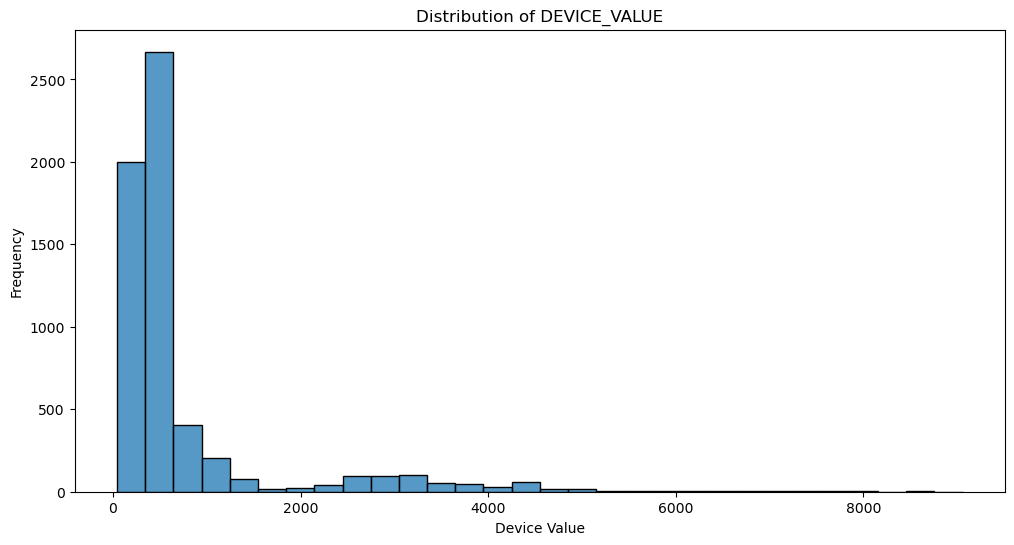

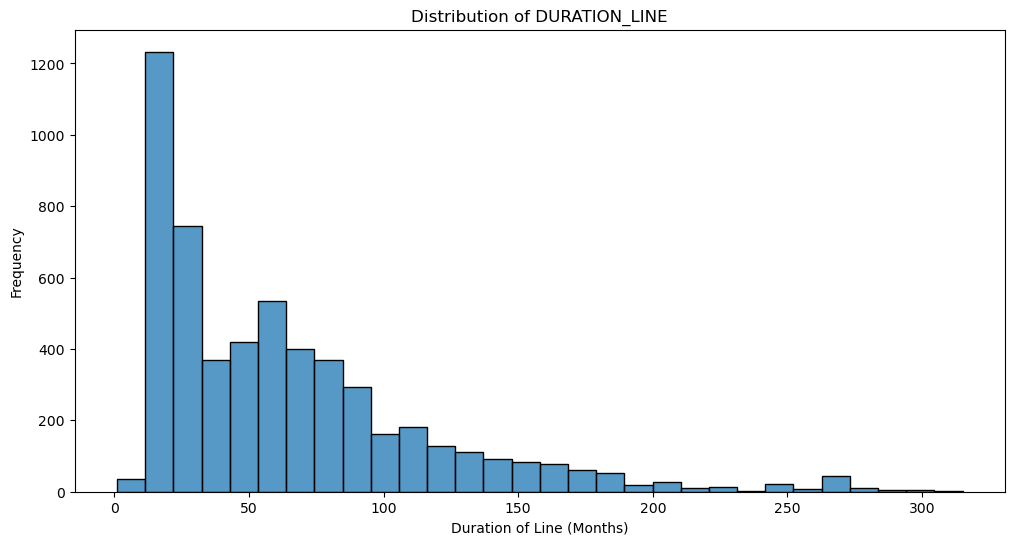

In [15]:
# Plot histogram for DEVICE_VALUE
plt.figure(figsize=(12, 6))
ax_device_value = sns.histplot(df04['DEVICE_VALUE'], kde=False, bins=30)
ax_device_value.set(title='Distribution of DEVICE_VALUE', xlabel='Device Value', ylabel='Frequency')
plt.show()

# Plot histogram for DURATION_LINE
plt.figure(figsize=(12, 6))
ax_duration_line = sns.histplot(df04['DURATION_LINE'], kde=False, bins=30)
ax_duration_line.set(title='Distribution of DURATION_LINE', xlabel='Duration of Line (Months)', ylabel='Frequency')
plt.show()

On the one hand, the distribution of `DEVICE_VALUE` is right-skewed, which means that there are many observations with low values. The observed distribution resembles an exponential distribution and it is unimodal since there is a single peak on the left. Hence, it can be said that most customers prefer low-cost devices. <p> The distribution of `DURATION_LINE` is also right-skewed. Indeed, the majority of customers have shorter line durations (between 0 and 100 months approximately). What is more, this distribution also follows an exponential distribution and it is unimodal.

We will now compare `VOICE_TRAFFIC_MONTH_1` against `VOICE_TRAFFIC_MONTH_6` and `BILLING_MONTH_1` against `BILLING_MONTH_6` using histograms with logarithmic scale on the y axis. 

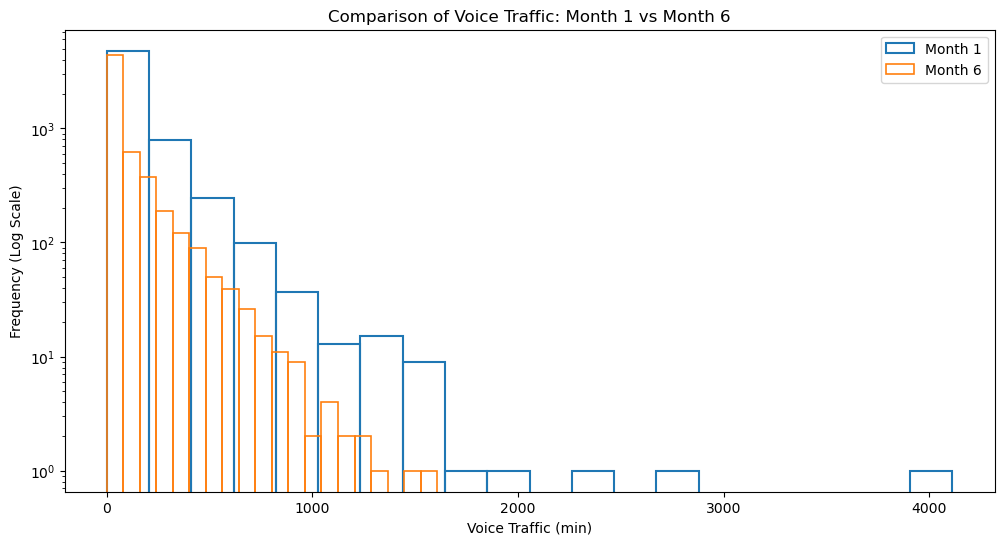

In [16]:
# Comparing VOICE_TRAFFIC_MONTH_1 and VOICE_TRAFFIC_MONTH_6
plt.figure(figsize=(12, 6))
sns.histplot(data=df04, x='VOICE_TRAFFIC_MONTH_1', bins=20, fill=False, label='Month 1', kde=False)
sns.histplot(data=df04, x='VOICE_TRAFFIC_MONTH_6', bins=20, fill=False, label='Month 6', kde=False)
plt.title('Comparison of Voice Traffic: Month 1 vs Month 6')
plt.xlabel('Voice Traffic (min)')
plt.ylabel('Frequency (Log Scale)')
plt.yscale('log')
plt.legend()
plt.show()

Regarding voice traffic, it can be seen that `VOICE_TRAFFIC_MONTH_1` shows a higher frequency of observations for each value of voice traffic, which indicates that more clients performed voice calls one month before purchasing a new device. What is more, the histogram shows that a few clients reached higher values of voice traffic in month 1 compared to month 6. This distribution suggests that the need for better communication capabilities -after having used voice services intensely during month 1- could have been the motivation for clients to buy a new device.

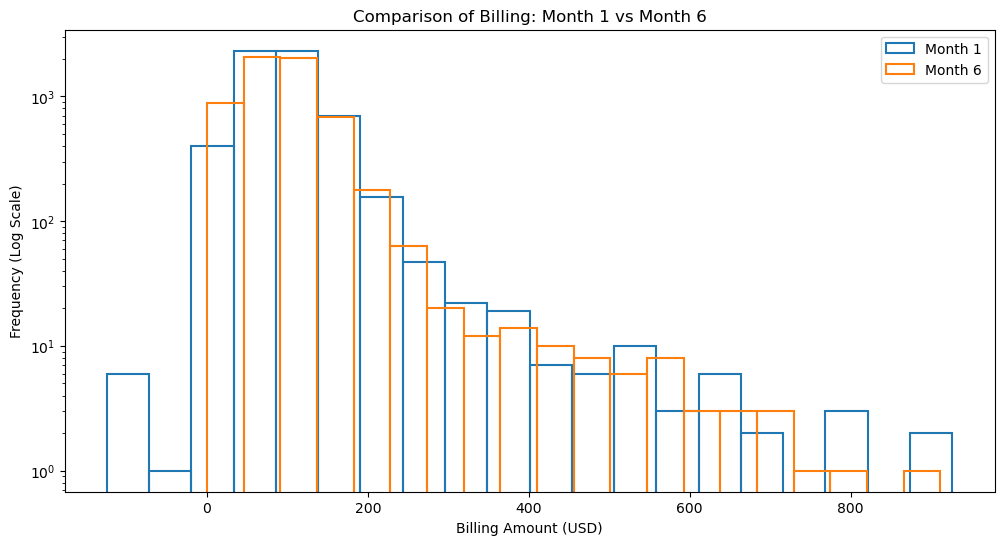

In [17]:
# Comparing BILLING_MONTH_1 and BILLING_MONTH_6
plt.figure(figsize=(12, 6))
sns.histplot(data=df04, x='BILLING_MONTH_1', bins=20, fill=False, label='Month 1', kde=False)
sns.histplot(data=df04, x='BILLING_MONTH_6', bins=20, fill=False, label='Month 6', kde=False)
plt.title('Comparison of Billing: Month 1 vs Month 6')
plt.xlabel('Billing Amount (USD)')
plt.ylabel('Frequency (Log Scale)')
plt.yscale('log')
plt.legend()
plt.show()

Comparing the histograms of `BILLING_MONTH_1` and `BILLING_MONTH_6`, several differences can be noted. Firstly, we can see negative values for the billing amount in month 1, which should be investigated further as it could suggest refunds to customers or administrative errors. Apart from this unusual behaviour, both histograms are similar in shape, which means that customers spent similar amounts 1 month and 6 months before buying a new device. However, higher billing amounts in month 1 correspond to higher frequencies. This suggests that a few clients may have experienced increased expenses shortly before upgrading their devices. 

The code below applies the `log(x+1)` function to `VOICE_TRAFFIC_MONTH_1` and plots its new distribution.

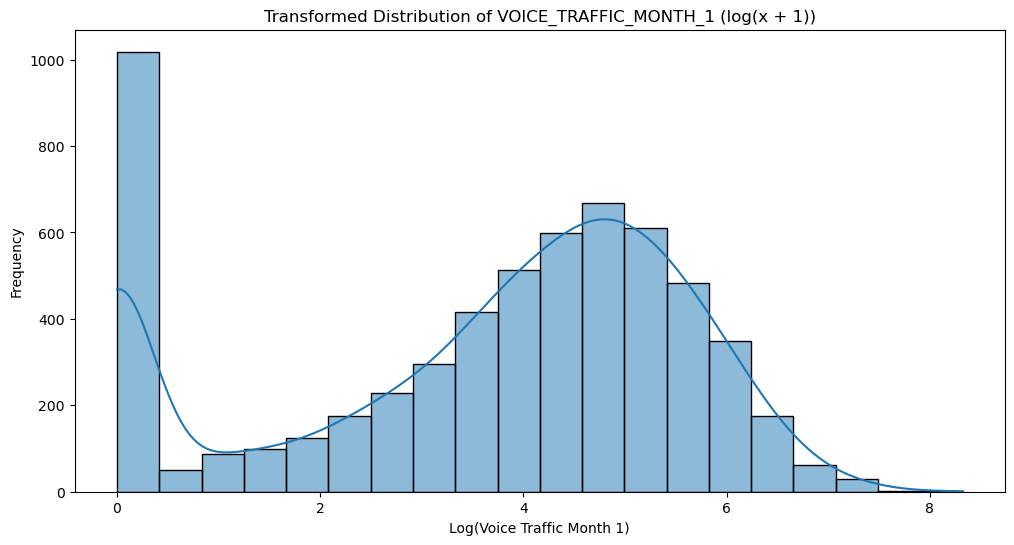

In [18]:
# Apply log(x + 1) transformation to VOICE_TRAFFIC_MONTH_1
df05 = df04.copy()
df05['VOICE_TRAFFIC_MONTH_1_LOG'] = np.log(df05['VOICE_TRAFFIC_MONTH_1'] + 1)

# Plot the new distribution
plt.figure(figsize=(12, 6))
ax = sns.histplot(df05['VOICE_TRAFFIC_MONTH_1_LOG'], bins=20, fill=True, kde=True)
ax.set(title='Transformed Distribution of VOICE_TRAFFIC_MONTH_1 (log(x + 1))', xlabel='Log(Voice Traffic Month 1)', ylabel='Frequency')
plt.show()

We now display 3 boxplots, one for each of the variables `DATA_TRAFFIC_MONTH_6`, `VOICE_TRAFFIC_MONTH_6` and `BILLING_MONTH_6`.

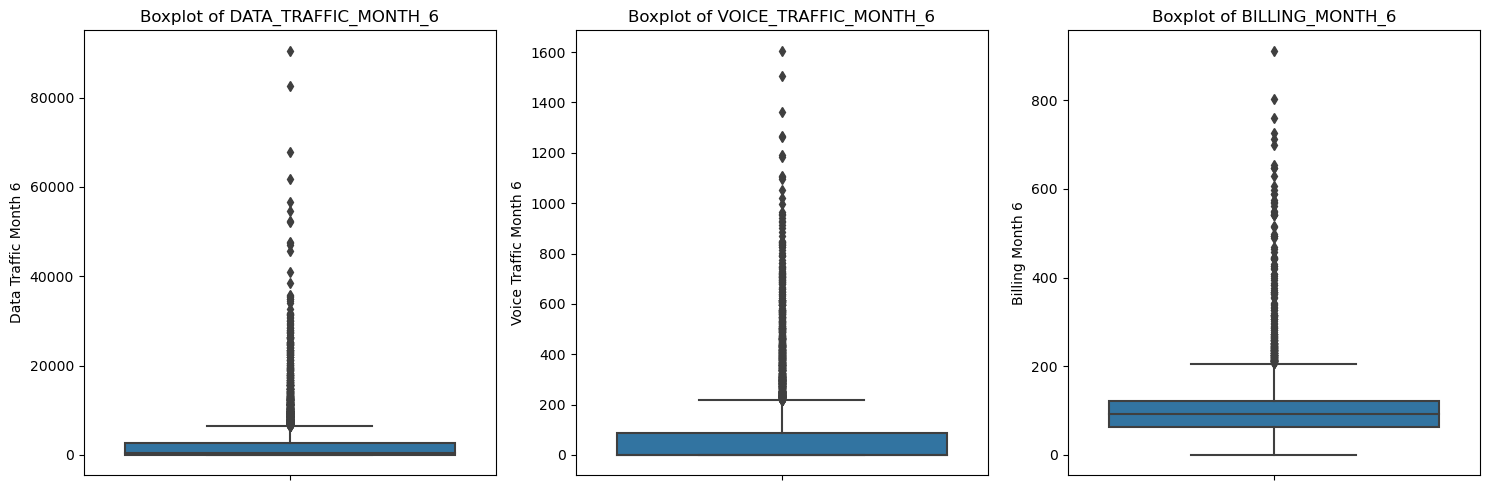

In [19]:
plt.figure(figsize=(15, 5))

# Boxplot for DATA_TRAFFIC_MONTH_6
plt.subplot(1, 3, 1)
sns.boxplot(y=df05['DATA_TRAFFIC_MONTH_6'])
plt.title('Boxplot of DATA_TRAFFIC_MONTH_6')
plt.ylabel('Data Traffic Month 6')

# Boxplot for VOICE_TRAFFIC_MONTH_6
plt.subplot(1, 3, 2)
sns.boxplot(y=df05['VOICE_TRAFFIC_MONTH_6'])
plt.title('Boxplot of VOICE_TRAFFIC_MONTH_6')
plt.ylabel('Voice Traffic Month 6')

# Boxplot for BILLING_MONTH_6
plt.subplot(1, 3, 3)
sns.boxplot(y=df05['BILLING_MONTH_6'])
plt.title('Boxplot of BILLING_MONTH_6')
plt.ylabel('Billing Month 6')

plt.tight_layout()
plt.show()


For `DATA_TRAFFIC_MONTH_6` I would use 40000 as extreme value to detect outliers. Regarding `VOICE_TRAFFIC_MONTH_6`, this extreme value would be 1000, and for `BILLING_MONTH_6` it would be 600. 

We proceed to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. We will display the result as a table with rows and columns corresponding to the columns of interest, and cells indicating correlations. 

In [20]:
# Select desired columns
columns_of_interest = [
    'VOICE_TRAFFIC_MONTH_1',
    'VOICE_TRAFFIC_MONTH_2',
    'VOICE_TRAFFIC_MONTH_3',
    'VOICE_TRAFFIC_MONTH_4',
    'VOICE_TRAFFIC_MONTH_5',
    'VOICE_TRAFFIC_MONTH_6',
    'DATA_TRAFFIC_MONTH_1',
    'DATA_TRAFFIC_MONTH_2',
    'DATA_TRAFFIC_MONTH_3',
    'DATA_TRAFFIC_MONTH_4',
    'DATA_TRAFFIC_MONTH_5',
    'DATA_TRAFFIC_MONTH_6',
    'DURATION_LINE',
    'BILLING_MONTH_1',
    'BILLING_MONTH_2',
    'BILLING_MONTH_3',
    'BILLING_MONTH_4',
    'BILLING_MONTH_5',
    'BILLING_MONTH_6',
    'DEVICE_COST_MONTH_1',
    'DEVICE_COST_MONTH_2',
    'DEVICE_COST_MONTH_3',
    'DEVICE_COST_MONTH_4',
    'DEVICE_COST_MONTH_5',
    'DEVICE_COST_MONTH_6',
    'DEVICE_VALUE'
]

# Compute the correlation matrix
correlation_matrix = df05[columns_of_interest].corr(method='pearson', numeric_only=True)

display(correlation_matrix)

,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONTH_5,VOICE_TRAFFIC_MONTH_6,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE
VOICE_TRAFFIC_MONTH_1,1.00,0.82,0.80,0.74,0.73,0.44,0.09,0.08,0.08,0.09,...,0.13,0.13,0.14,-0.01,0.00,0.01,0.00,0.01,0.01,0.02
VOICE_TRAFFIC_MONTH_2,0.82,1.00,0.98,0.83,0.81,0.51,0.07,0.08,0.08,0.09,...,0.11,0.11,0.12,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03
VOICE_TRAFFIC_MONTH_3,0.80,0.98,1.00,0.85,0.82,0.51,0.07,0.08,0.08,0.09,...,0.11,0.11,0.12,-0.01,0.01,-0.00,0.00,0.00,0.01,0.03
VOICE_TRAFFIC_MONTH_4,0.74,0.83,0.85,1.00,0.88,0.46,0.07,0.07,0.07,0.09,...,0.12,0.12,0.12,-0.01,0.01,0.01,-0.00,-0.00,0.01,0.02
VOICE_TRAFFIC_MONTH_5,0.73,0.81,0.82,0.88,1.00,0.50,0.08,0.08,0.08,0.10,...,0.12,0.13,0.12,-0.01,-0.00,0.00,-0.01,-0.01,0.00,0.03
VOICE_TRAFFIC_MONTH_6,0.44,0.51,0.51,0.46,0.50,1.00,0.05,0.03,0.03,0.03,...,0.09,0.11,0.10,-0.00,0.01,0.00,0.01,0.01,0.02,0.02
DATA_TRAFFIC_MONTH_1,0.09,0.07,0.07,0.07,0.08,0.05,1.00,0.76,0.73,0.70,...,0.20,0.19,0.19,0.01,0.05,0.08,0.08,0.08,0.08,0.12
DATA_TRAFFIC_MONTH_2,0.08,0.08,0.08,0.07,0.08,0.03,0.76,1.00,0.97,0.79,...,0.19,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.11
DATA_TRAFFIC_MONTH_3,0.08,0.08,0.08,0.07,0.08,0.03,0.73,0.97,1.00,0.81,...,0.20,0.19,0.20,0.01,0.05,0.06,0.07,0.07,0.07,0.12
DATA_TRAFFIC_MONTH_4,0.09,0.09,0.09,0.09,0.10,0.03,0.70,0.79,0.81,1.00,...,0.20,0.21,0.22,0.01,0.05,0.07,0.07,0.07,0.07,0.12


We will also display the result as an image using `matshow`.

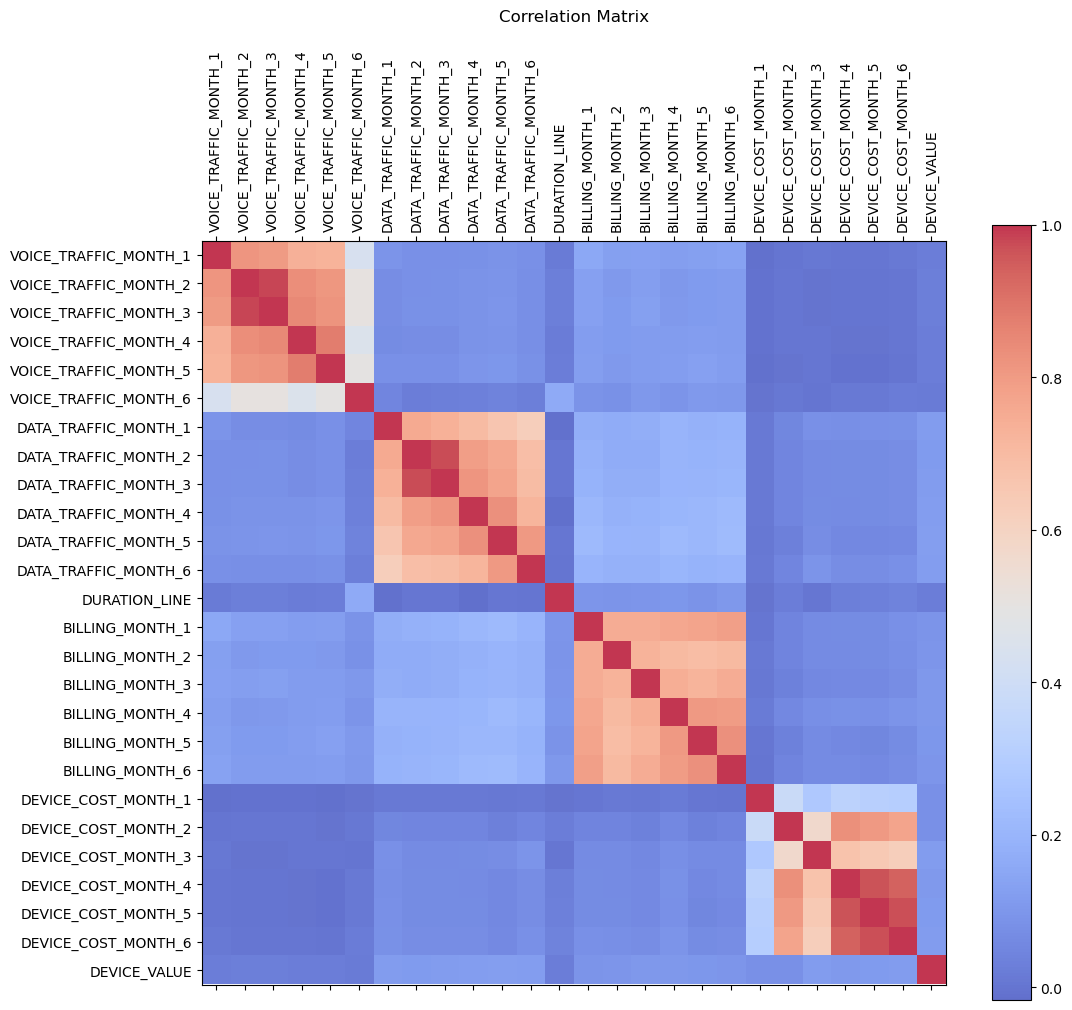

In [21]:
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', alpha=0.8)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

On the one hand, we can see strong positive correlations between billing and traffic (both `DATA_TRAFFIC` and `VOICE_TRAFFIC`). <br> On the other hand, the correlation between `DEVICE_COST_MONTH(1..6)` and `VOICE_TRAFFIC` is almost 0, which indicates that the cost associated to the mobile device does not impact how much voice traffic a customer generates. In the case of `DATA_TRAFFIC`, however, the correlation with `DEVICE_COST_MONTH(1..6)` is more noticeable. A similar pattern is observed with `DEVICE_VALUE`. <br> What is more, the image shows that the billing is more correlated with the data traffic than with the voice traffic.

## 2.3. Date management and period calculation

We now determine the date of the last device that was changed in the entire dataset and the current date (assuming we are doing this processing 30 days after the latest device change).

In [22]:
# Convert LAST_DEVICE_CHANGE to integer and get the maximum value
max_last_device_change = int(df05['LAST_DEVICE_CHANGE'].max())
# Convert to string
latest_change_str = str(max_last_device_change)

# Convert to a datetime object
latest_change = datetime.datetime.strptime(latest_change_str, '%Y%m%d')

# Add 30 days to the latest_change date
now = latest_change + datetime.timedelta(days=30)

print(latest_change)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


Now, we obtain the column `MONTHS_LAST_DEVICE` by computing the difference between `now` and `LAST_DEVICE_CHANGE` in months.

In [23]:
# Convert LAST_DEVICE_CHANGE to datetime
series_converted = pd.to_datetime(df05['LAST_DEVICE_CHANGE'], format='%Y%m%d')

# Calculate the difference between now and the series_converted
difference = now - series_converted

# Obtain the difference in months
months_last_device = difference / datetime.timedelta(days=30)

# Replace the MONTHS_LAST_DEVICE column with the calculated values
df06 = df05.copy()
df06['MONTHS_LAST_DEVICE'] = months_last_device.fillna(0).astype(int)

display(df06[['LAST_DEVICE_CHANGE', 'MONTHS_LAST_DEVICE']].head())

,LAST_DEVICE_CHANGE,MONTHS_LAST_DEVICE
0,NaN,0
1,20170401.00,26
2,NaN,0
3,20171001.00,20
4,20190101.00,5


Then, we update the `DURATION_LINE` value to be the difference, in days, between `LINE_ACTIVATION_DATE` and the `now` variable.

In [24]:
# Convert LINE_ACTIVATION_DATE to datetime
line_activation_date_converted = pd.to_datetime(df06['LINE_ACTIVATION_DATE'], format='%Y%m%d')

df07 = df06.copy()
# Calculate the difference in days between now and LINE_ACTIVATION_DATE
df07['DURATION_LINE'] = (now - line_activation_date_converted).dt.days

# Calculate the average DURATION_LINE
average_duration_line = df07['DURATION_LINE'].mean()

# Convert from days to years
average_duration_years = average_duration_line / 365

print(f'Average DURATION_LINE: {average_duration_line:.2f} days ({average_duration_years:.2f} years)')

Average DURATION_LINE: 1950.77 days (5.34 years)



## 2.4. Standarization and scaling of numerical variables

The code below is used to standardize and min-max scale the `DATA_TRAFFIC_MONTH_1`, `VOICE_TRAFFIC_MONTH_1`, `BILLING_MONTH_1` and `DEVICE_COST_MONTH_1` columns.

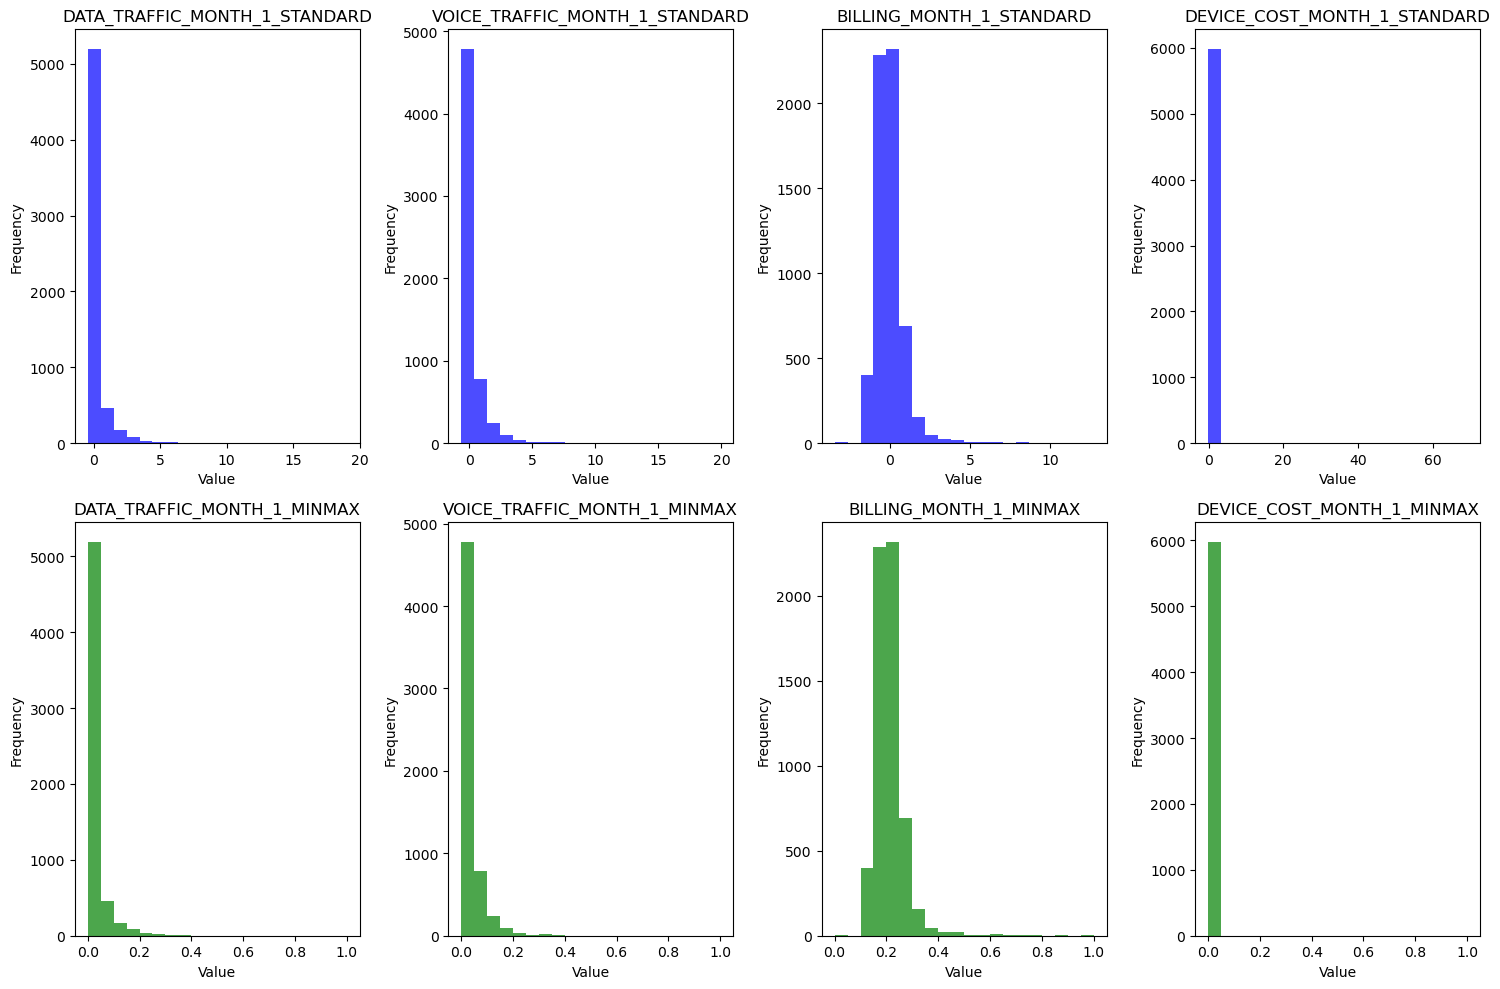

In [25]:
df08 = df07.copy()

columns = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

# Apply standard scaler and min-max scaler
df08[[f'{col}_STANDARD' for col in columns]] = StandardScaler().fit_transform(df08[columns])
df08[[f'{col}_MINMAX' for col in columns]] = MinMaxScaler().fit_transform(df08[columns])

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)
    plt.hist(df08[f'{col}_STANDARD'], bins=20, color='blue', alpha=0.7)
    plt.title(f'{col}_STANDARD')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 4, i + 5)
    plt.hist(df08[f'{col}_MINMAX'], bins=20, color='green', alpha=0.7)
    plt.title(f'{col}_MINMAX')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

We now create the variable `PREVIOUS_DEVICE_BRAND_INT_ENCODED` containing an integer encoding of variable `PREVIOUS_DEVICE_BRAND`.

In [26]:
df09 = df08.copy();

label_encoder = LabelEncoder() # Initalize

# Transform the PREVIOUS_DEVICE_BRAND column
df09['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(df09['PREVIOUS_DEVICE_BRAND'])

display(df09[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']].head())

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3


The code below converts `PREVIOUS_DEVICE_MANUF` to dummy binary variables.

In [27]:
df10 = df09.copy()

# Convert PREVIOUS_DEVICE_MANUF to dummy binary variables
previous_device_manuf_dummies = pd.get_dummies(df10['PREVIOUS_DEVICE_MANUF'], prefix='manuf_')
df10 = df10.join(previous_device_manuf_dummies)

display(df10.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,manuf__Telit Communications SpA,manuf__Topmax Glory Limited,manuf__Umi Network Technology Co Limited,manuf__United Mobile,manuf__United Time Hong Kong Ltd,manuf__Vikin Communication Technology Co Limited,manuf__Vogtec (H.K) Co Ltd,manuf__Xiaomi Communications Co Ltd,manuf__ZTE Corporation,manuf__u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,False,False,False,False,False,False,False,False,False,False
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,False,False,False,False,False,False,False,False,False,False
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,False,False,False,False,False,False,False,False,False,False
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,False,False,False,False,False,False,False,False,False,False
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,False,False,False,False,False,False,False,False,False,False


## 2.6. Feature generation

The cell below creates new columns with the mean, maximum, minimum, and range from the 6 months of `DATA_TRAFFIC_MONTH_[1-6]`, `VOICE_TRAFFIC_MONTH_[1-6]`, `BILLING_MONTH_[1-6]` and `DEVICE_COST_MONTH_[1-6]`.

In [28]:
df11 = df10.copy()

groups = ['DATA_TRAFFIC', 'VOICE_TRAFFIC', 'BILLING', 'DEVICE_COST']

# Select all months from each category
for group in groups:
    columns = [f'{group}_MONTH_{i}' for i in range(1, 7)]
    
    # Compute statistics and create new columns
    df11[f'{group}_MEAN'] = df11[columns].mean(axis=1)
    df11[f'{group}_MAX'] = df11[columns].max(axis=1)
    df11[f'{group}_MIN'] = df11[columns].min(axis=1)
    df11[f'{group}_RANGE'] = df11[f'{group}_MAX'] - df11[f'{group}_MIN']
    
display(df11.head())

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.00,NaN,465.25,530.81,530.81,781.13,398.99,1169.40,47.50,...,21.80,57.90,92.96,107.93,85.00,22.93,12.00,12.00,12.00,0.00
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20170401.00,232.24,272.26,272.26,704.89,412.72,365.14,3.70,...,0.50,4.40,49.44,56.56,47.00,9.56,0.00,0.00,0.00,0.00
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.00,NaN,484.62,264.14,264.14,348.50,380.44,250.74,26.10,...,26.10,192.60,121.78,129.14,113.77,15.37,0.00,0.00,0.00,0.00
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.00,20171001.00,4255.46,836.12,836.12,691.56,146.77,302.49,175.70,...,119.00,112.20,58.22,60.93,55.99,4.94,6.00,6.00,6.00,0.00
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.00,20190101.00,5014.10,2659.05,2659.05,2435.04,2053.98,1553.12,383.90,...,0.00,383.90,109.70,110.69,107.99,2.70,0.00,0.00,0.00,0.00


We now create an additional column `DEVICE_COST_TO_BILLING_RATIO` containing the ratio between `DEVICE_COST_MEAN` and `BILLING_MEAN` and plot its distribution.

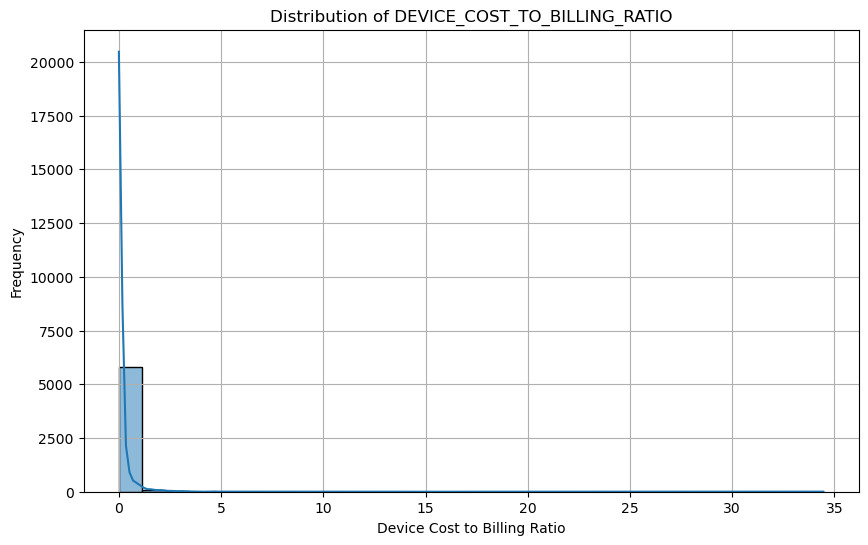

In [29]:
# Create the DEVICE_COST_TO_BILLING_RATIO column
df12 = df11.copy()
df12['DEVICE_COST_TO_BILLING_RATIO'] = df12['DEVICE_COST_MEAN'] / df12['BILLING_MEAN']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df12['DEVICE_COST_TO_BILLING_RATIO'], bins=30, kde=True, fill=True)
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')
plt.xlabel('Device Cost to Billing Ratio')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Firstly, the plot is right-skewed, indicating that the majority of the data is concentrated around the value 0 for the device cost to billing ratio. This suggests that for most customers, the mean device cost is very small compared to the billing mean. <br> The presence of some outliers should also be noted, with some customers having a device cost to billing ratio near 35. In other words, for some particular customers, the cost of their device is higher relative to their billing mean. <br> Lastly, the plot resembles the Pareto distribution.

## 2.7. Text parsing/processing

We will now use the `PURCHASED_DEVICE` variable to create 3 new columns with the following variables names: `PURCHASED_DEVICE_CODE`, `PURCHASED_DEVICE_MANUFACTURER` and `PURCHASED_DEVICE_MODEL`.

In [30]:
df13 = df12.copy()

# Replace the space between the manufacturer and the device model with an underscore
df13['PURCHASED_DEVICE'] = df13['PURCHASED_DEVICE'].str.replace(' ', '_', n=1)

# Split PURCHASED_DEVICE into 3 new columns
df13[['PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']] = (
    df13['PURCHASED_DEVICE'].str.split('_', expand=True)
)

display(df13[['PURCHASED_DEVICE', 'PURCHASED_DEVICE_CODE', 'PURCHASED_DEVICE_MANUFACTURER', 'PURCHASED_DEVICE_MODEL']].head())

,PURCHASED_DEVICE,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG_X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG_X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA_XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG_X210BMW SMARTPHONE PRETO PPB/P...,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA_XT1922 SMARTPHONE INDIGO,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO


The code below is used to create two tables: one with the number of devices per manufacturer in `PURCHASED_DEVICE_MANUFACTURER` and one with the number of devices per manufacturer in `PREVIOUS_DEVICE_MANUF`.

In [31]:
df14 = df13.copy()

# Get the number of devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER
purchased_device_counts = df14['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
purchased_device_counts.columns = ['Manufacturer', 'Number of Devices']

# Get the number of devices per manufacturer in PREVIOUS_DEVICE_MANUF
previous_device_counts = df14['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
previous_device_counts.columns = ['Manufacturer', 'Number of Devices']

print("Number of Devices per Manufacturer (Purchased):")
display(purchased_device_counts)
print("\nNumber of Devices per Manufacturer (Previous):")
display(previous_device_counts)

Number of Devices per Manufacturer (Purchased):


,Manufacturer,Number of Devices
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2



Number of Devices per Manufacturer (Previous):


,Manufacturer,Number of Devices
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Lanxun Technology (Hong Kong) Limited,1
63,Beijing Flyscale Technologies Company Limited,1
64,Meizu Technology Co Ltd,1
65,TP-Link Technologies Co Ltd,1


## 2.8. Splitting and sampling a dataset

The code below splits the dataset intotwo separate datasets: one with 70% of the rows and the other with 30% of rows.

In [32]:
# Split dataset into training and testing sets
train_df, test_df = train_test_split(df14, test_size=0.3, random_state=42)

Now, we compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables `DATA_TRAFFIC_MONTH_1`, `VOICE_TRAFFIC_MONTH_1` and `BILLING_MONTH_1` in both the training and testing sets.

In [33]:
# Compute the main stats in the training set
train_stats = train_df[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

# Compute the main stats in the testing set
test_stats = test_df[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()

print("Training Set Statistics:")
print(train_stats)

print("\nTesting Set Statistics:")
print(test_stats)

Training Set Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               4191.00                4191.00          4191.00
mean                2549.41                 132.02           100.03
std                 5612.93                 203.67            65.03
min                    0.00                   0.00          -124.49
25%                    0.00                  10.20            63.36
50%                  399.50                  64.20            92.99
75%                 2842.26                 171.55           121.14
max               112421.17                4113.00           911.72

Testing Set Statistics:
       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count               1797.00                1797.00          1797.00
mean                2567.66                 127.12            98.42
std                 6135.75                 191.84            64.83
min                    0.00                   0.00           -21.0

In general, the statistics show that the training and testing sets have similar distributions for the three variables studied. However, there are important differences in the minimum and maximum values, suggesting that the training set has some extreme values that cannot be found in the testing set.

# 3. Comparing iPhone and Samsung J series users

We will now create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.

In [34]:
# Apple iPhone df
apple_users = df14[df14['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE']

# Samsung J df
samsung_j_users = df14[df14['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG']
# Include only those users with Samsung models that start with a J
samsung_j_users = samsung_j_users[samsung_j_users['PURCHASED_DEVICE_MODEL'].str.startswith('J')]

print("Apple iPhone Users:")
display(apple_users.head())

print("\nSamsung J Series Users:")
display(samsung_j_users.head())

Apple iPhone Users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE_IPHONE 8 256GB CINZA PPB/PI...,3465.00,20170101.00,1520.21,2196.57,2196.57,1815.70,2101.68,3224.28,206.90,...,115.00,71.31,13.00,13.00,13.00,0.00,0.09,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE_IPHONE 8 64GB CINZA PPB/PI6...,3081.00,20170901.00,990.28,1011.10,1011.10,1025.97,2778.35,1822.95,102.90,...,60.99,2.96,124.00,124.00,124.00,0.00,1.98,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE_IPHONE 8 256GB CINZA PPB/PI...,3681.00,20161001.00,3916.90,2703.32,2703.32,1860.90,3112.77,2625.42,160.90,...,192.84,105.96,122.00,183.00,0.00,183.00,0.50,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE_IPHONE 8 64GB CINZA PPB/PI...,2841.00,20170901.00,1017.51,1079.26,1079.26,1178.98,1192.97,1070.23,303.20,...,148.99,39.76,7.00,7.00,7.00,0.00,0.04,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE_IPHONE 8 64GB CINZA PPB/PI...,2961.00,20170901.00,257.39,604.09,604.09,1394.24,102.60,107.84,117.30,...,74.99,60.00,7.00,7.00,7.00,0.00,0.08,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10



Samsung J Series Users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG_J415G SMART PRETO PPB/PI1...,921.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,171.30,...,113.85,56.53,0.00,0.00,0.00,0.00,0.00,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG_J260M SMART PRETO PPB/PI...,633.00,20160801.00,4.53,464.09,695.10,223.33,223.33,247.85,298.00,...,45.59,24.30,2.50,15.00,0.00,15.00,0.04,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG_J610G SMART PRETO PPB/PI1...,705.00,20141001.00,8396.93,9907.53,9907.53,5994.02,6872.61,5246.00,153.00,...,146.95,93.09,47.33,71.00,0.00,71.00,0.28,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG_J810M SMART PRETO PPB/PI1...,1545.00,20140101.00,2047.26,1597.99,1597.99,1501.05,843.06,1631.07,74.40,...,183.99,5.64,0.00,0.00,0.00,0.00,0.00,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG_J400M SMART PRETO PPB/PI1...,873.00,20140101.00,4185.32,2036.57,2036.57,424.27,2934.92,2847.61,61.00,...,112.99,42.95,0.00,0.00,0.00,0.00,0.00,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


We will now compare the variables `DEVICE_VALUE` and `BILLING_MEAN` between the Apple and the Samsung J Series users datasets.

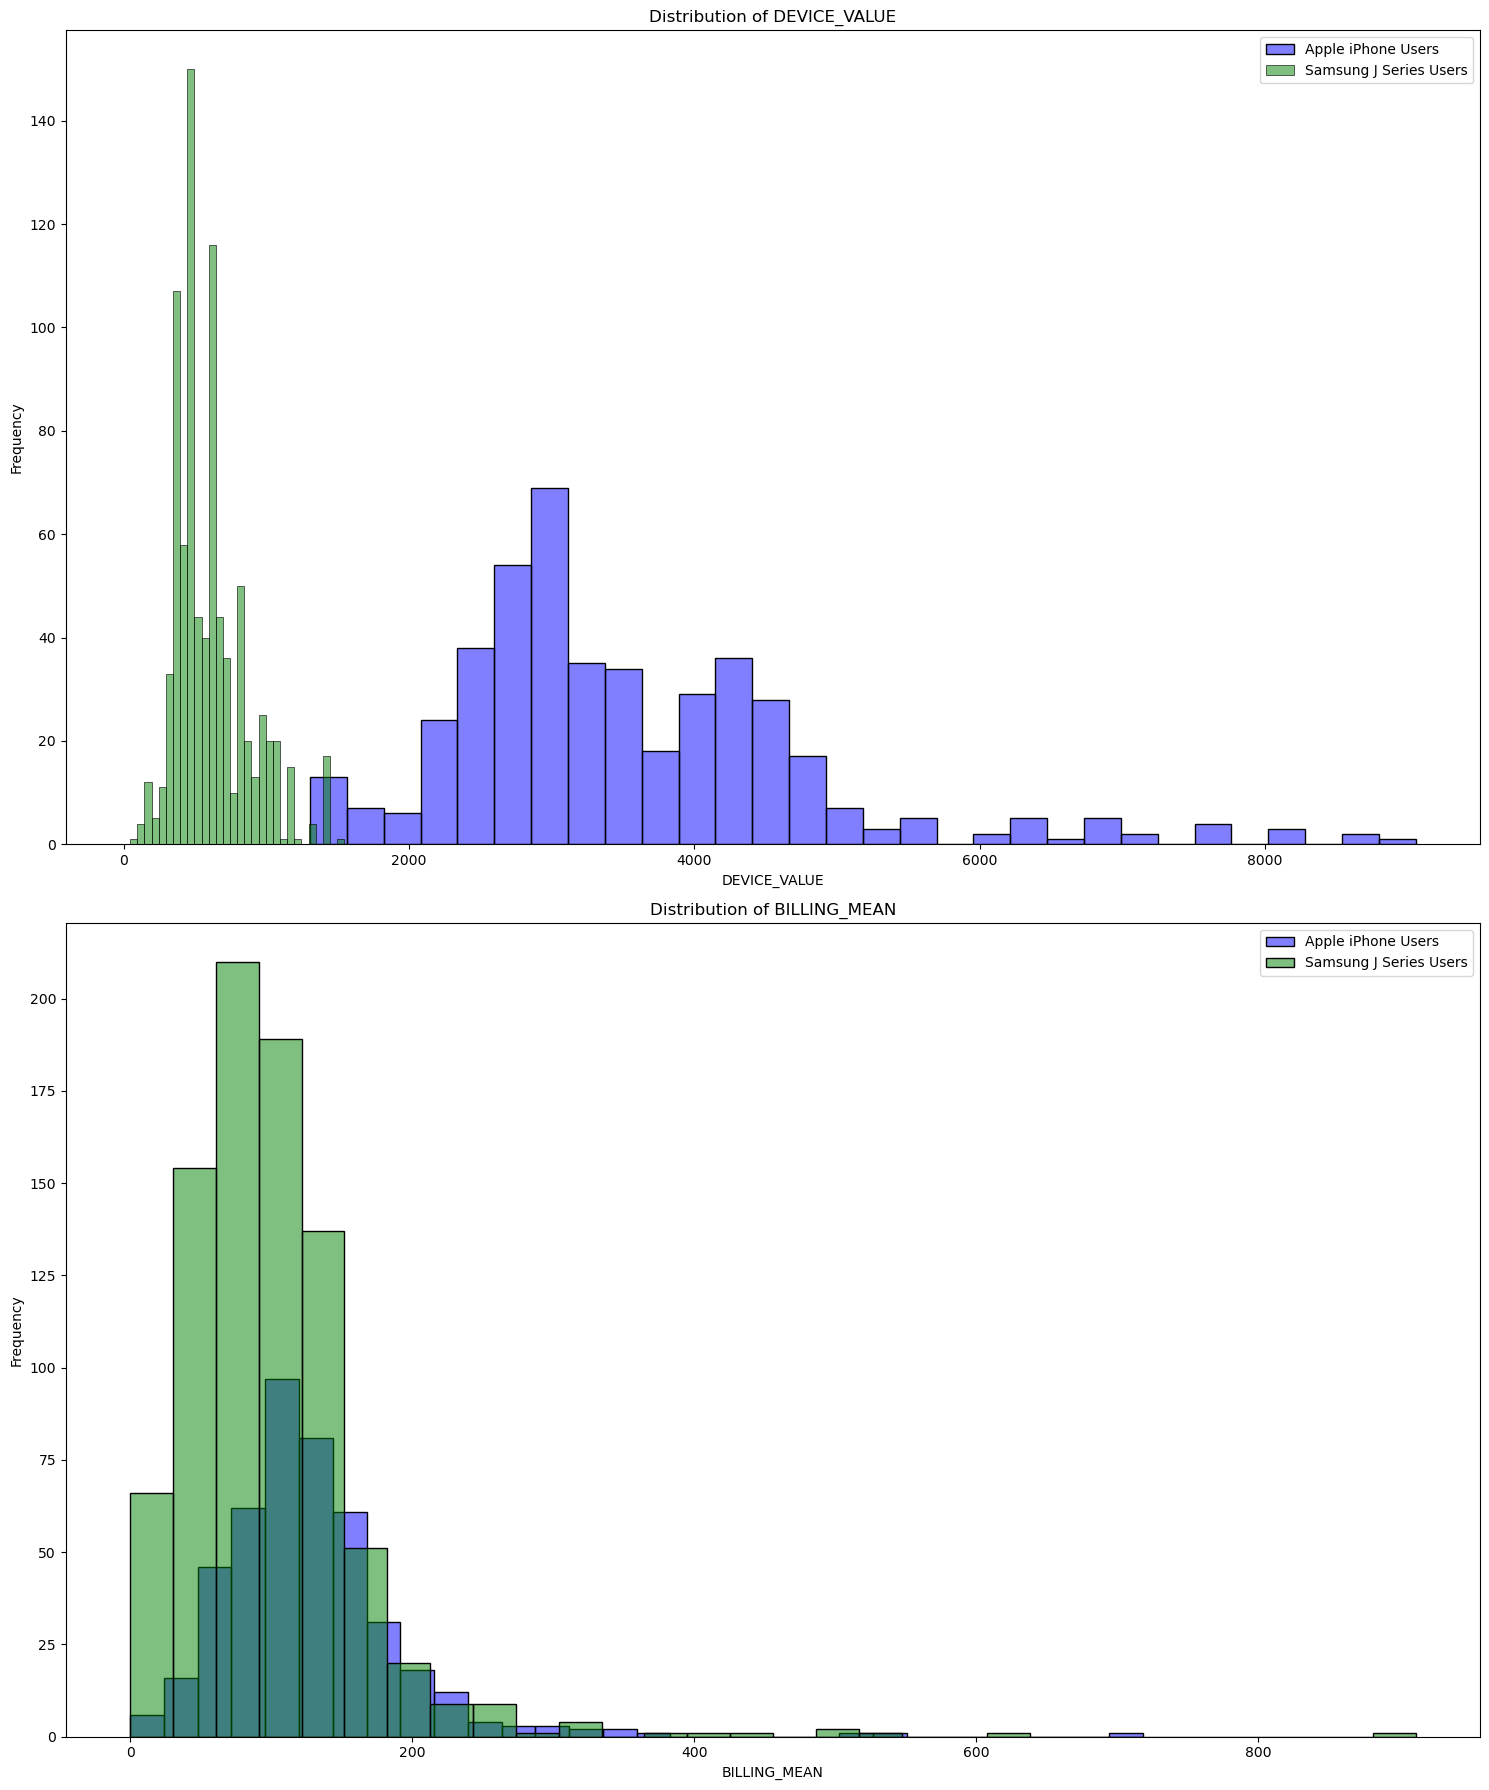

In [35]:
# Select the variables we want to compare
variables = ['DEVICE_VALUE', 'BILLING_MEAN']

plt.figure(figsize=(15, 18))

for i, variable in enumerate(variables):
    plt.subplot(2, 1, i + 1)
    
    # Histogram for Apple iPhone users
    sns.histplot(apple_users[variable], bins=30, color='blue', alpha=0.5, label='Apple iPhone Users', kde=False)
    
    # Histogram for Samsung J users
    sns.histplot(samsung_j_users[variable], bins=30, color='green', alpha=0.5, label='Samsung J Series Users', kde=False)
    
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

Regarding the value of the device, the histogram confirms that Apple iPhone models have significantly larger prices than Samsung J Series devices. It is also worth mentioning that the range of prices for Apple iPhone is significantly wider than that of Samsung J Series models. Furthermore, the frequency of lower device values for Samsung J users is much higher than the frequency of lower device values of Apple iPhone, which suggests that Samsung is a more accessible brand. <p> As for the billing mean, it can be seen that the distribution of Apple iPhone users is slightly shifted to the right compared with the distribution of Samsung J Series users. In other words, customers with Apple iPhone have higher billing means than those with Samsung J Series models. Although it could be argued that both distributions are right-skewed, the skewness of Samsung J Series Users is more pronounced, indicating that many users in this group are on more budget-friendly data plans. 

We will now create two decision tree models to predict the `PURCHASED_DEVICE_MANUFACTURER`: one with 3 input variables and the other with 5. Finally, we will compare the accuracy of both models.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
# Convert categorical features to numerical with one-hot encoding
df_encoded = pd.get_dummies(df14, columns=['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND', 'PURCHASED_DEVICE_MANUFACTURER'])

# Select the input columns after one-hot encoding

# Define the 3 input features and the target variable
# Column names have changed after one-hot encoding
X3 = df_encoded.loc[:, df_encoded.columns.str.startswith('PREVIOUS_DEVICE_MODEL_') | df_encoded.columns.str.startswith('PREVIOUS_DEVICE_BRAND_') | (df_encoded.columns == 'MONTHS_LAST_DEVICE')]
y3 = df_encoded.loc[:, df_encoded.columns.str.startswith('PURCHASED_DEVICE_MANUFACTURER_')].idxmax(axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Train DT
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train, y_train) # Fit the model to the training data
y_pred3 = model3.predict(X_test) # Predict on the test data
acc3 = accuracy_score(y_test, y_pred3)
print("Accuracy of the model with 3 features:", acc3)

Accuracy of the model with 3 features: 0.5314412910406232


In [38]:
# Create a new improved model with two more features:
# DEVICE_COST_MEAN and DEVICE_VALUE

X5 = df_encoded.loc[:, df_encoded.columns.str.startswith('PREVIOUS_DEVICE_MODEL_') | 
                    df_encoded.columns.str.startswith('PREVIOUS_DEVICE_BRAND_') | 
                    (df_encoded.columns == 'MONTHS_LAST_DEVICE') |
                    (df_encoded.columns == 'DEVICE_COST_MEAN') | 
                    (df_encoded.columns == 'DEVICE_VALUE')]
y5 = df_encoded.loc[:, df_encoded.columns.str.startswith('PURCHASED_DEVICE_MANUFACTURER_')].idxmax(axis=1)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state=42)

model5 = DecisionTreeClassifier(random_state=42)
model5.fit(X_train5, y_train5)  
y_pred5 = model5.predict(X_test5) 

acc5 = accuracy_score(y_test5, y_pred5)
print("Accuracy of the model with 5 features:", acc5)

Accuracy of the model with 5 features: 0.80189204229271


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>